<a href="https://colab.research.google.com/github/sun-gif/Deep-learning/blob/master/LSMT_for_smart_phone_sensor_time_series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1) Load data
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving labels.txt to labels.txt
Saving gyro_exp19_user10.txt to gyro_exp19_user10.txt
Saving gyro_exp18_user09.txt to gyro_exp18_user09.txt
Saving gyro_exp17_user09.txt to gyro_exp17_user09.txt
Saving gyro_exp16_user08.txt to gyro_exp16_user08.txt
Saving gyro_exp15_user08.txt to gyro_exp15_user08.txt
Saving gyro_exp14_user07.txt to gyro_exp14_user07.txt
Saving gyro_exp13_user07.txt to gyro_exp13_user07.txt
Saving gyro_exp12_user06.txt to gyro_exp12_user06.txt
Saving gyro_exp11_user06.txt to gyro_exp11_user06.txt
Saving gyro_exp10_user05.txt to gyro_exp10_user05.txt
Saving gyro_exp09_user05.txt to gyro_exp09_user05.txt
Saving gyro_exp08_user04.txt to gyro_exp08_user04.txt
Saving gyro_exp07_user04.txt to gyro_exp07_user04.txt
Saving gyro_exp06_user03.txt to gyro_exp06_user03.txt
Saving gyro_exp05_user03.txt to gyro_exp05_user03.txt
Saving gyro_exp04_user02.txt to gyro_exp04_user02.txt
Saving gyro_exp03_user02.txt to gyro_exp03_user02.txt
Saving gyro_exp02_user01.txt to gyro_exp02_user01.

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:

import io

labels= pd.read_csv(io.BytesIO(uploaded['labels.txt']),sep=" ",header=None)


Ideally, when working with multivariate time series data, it is useful to have the data structured in the format:1
[samples, timesteps, features]

In [4]:
# load dataset
from numpy import hstack
from numpy import dstack
import numpy as np
from pandas import read_csv
import io
import math 
from numpy import array
# load a single file as a numpy array
import torch.nn.functional as f

In [5]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe= pd.read_csv(io.BytesIO(uploaded[filepath]),sep=" ",header=None)
	#dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.to_numpy()

In [6]:

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [7]:
def label_transfer(label):
  new={}

  newtarget=pd.DataFrame()
  for i in range(len(label)):
    tw=[]
    for x in range (label.iloc[i,3], label.iloc[i,4]):
        tw.append(x)
    new['class']=label.iloc[i,2]
    new['interval']=tw
    new['user']    =label.iloc[i,0]
    new['experiement']=label.iloc[i,1]
    cla=pd.DataFrame.from_dict(new)
    #print(cla)
    newtarget=pd.concat([newtarget, cla])    
  return newtarget

In [8]:
#create path pair
def load_group(name1,name2,i):
  acc_gyro={}
  newtarget=pd.DataFrame()
  if i<10:
      filenames1= name1 + '_exp0' + str(i) + '_user0' + str(math.ceil(i/2)) + '.txt'
      filenames2= name2 + '_exp0' + str(i) + '_user0' + str(math.ceil(i/2)) + '.txt'
  elif i<19:
      filenames1=	name1 +'_exp'+str(i)+'_user0'+ str(math.ceil(i/2)) +'.txt'
      filenames2=	name2 +'_exp'+str(i)+'_user0'+ str(math.ceil(i/2)) +'.txt'
  elif i==19:   
      filenames1=	name1 +'_exp'+str(i)+'_user10'+'.txt'
      filenames2=	name2 +'_exp'+str(i)+'_user10'+'.txt' 
  else:
      filenames1=	name1 +'_exp'+str(i)+'_user'+ str(math.floor(i/2)) + '.txt'
      filenames2=	name2 +'_exp'+str(i)+'_user'+ str(math.floor(i/2)) + '.txt' 
      
  data1 = load_file(filenames1)
      #print(data1.head())
  data2 = load_file(filenames2)
  acc_gyro['exp']=i
  
  acc_gyro['user']=math.ceil(i/2)
  acc_gyro['acc_x']=data1[:,0].tolist()
  acc_gyro['acc_y']=data1[:,1].tolist()
  acc_gyro['acc_z']=data1[:,2].tolist()
  acc_gyro['gyro_x']=data2[:,0].tolist()
  acc_gyro['gyro_y']=data2[:,1].tolist()
  acc_gyro['gyro_z']=data2[:,2].tolist()
    #acc_gyro['6param']=data.tolist()
  new6p=pd.DataFrame.from_dict(acc_gyro)
  new6p=new6p.sort_index()
    #new6p=new6p.sort_values(by=[''])
 
    #print(cla)
    #new6p=pd.concat([newtarget, cla])
  label=labels[(labels[0] ==i )& (labels[1]==math.ceil(i/2))]
  newlabeldf=label_transfer(label)
  fclass=pd.merge(new6p,newlabeldf,how='right',right_on='interval',left_on=new6p.index)
  dataset=fclass[['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','class']].to_numpy()
  X, y= split_sequences(dataset, 128)
  X=torch.from_numpy(X)
  y=torch.from_numpy(y)
#image_path.items
  return X,y

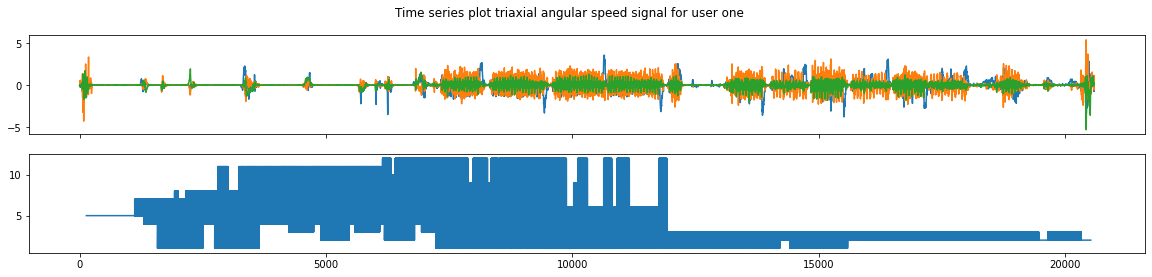

In [ ]:

#fclass=pd.merge(newtarget,gyro,how='right',left_on='interval',right_on=gyro.index)

#fclass=fclass.sort_values(by=['interval'])


fig, axes = plt.subplots(2,sharex=True, figsize=(20,4))

fig.suptitle('Time series plot triaxial angular speed signal for user one')
#fig.legend(label, loc = 'upper center')

axes[1].plot(fclass['interval'],fclass['class'],label='Classes')
#lines, labels = fig.axes[1].get_legend_handles_labels()
    
#fig.legend(lines, labels, loc = 'lower center')
axes[0].plot(fclass['interval'],fclass[0],label='x')
axes[0].plot(fclass['interval'],fclass[1],label='y')
axes[0].plot(fclass['interval'],fclass[2],label='z')

(array([3.50000e+01, 0.00000e+00, 7.20000e+01, 1.07000e+02, 1.06000e+02,
        1.44000e+02, 2.49000e+02, 1.42000e+02, 7.10000e+01, 1.04000e+02,
        3.50000e+01, 7.10000e+01, 6.90000e+01, 1.02000e+02, 1.87000e+02,
        2.34000e+02, 1.08000e+02, 2.97000e+02, 4.29000e+02, 4.29000e+02,
        3.39000e+02, 2.75000e+02, 1.73000e+02, 4.30000e+02, 4.19000e+02,
        5.91000e+02, 3.97000e+02, 3.36000e+02, 3.56000e+02, 4.29000e+02,
        2.76000e+02, 4.60000e+02, 2.57000e+02, 6.59000e+02, 3.88000e+02,
        3.18000e+02, 5.82000e+02, 3.91000e+02, 7.26000e+02, 3.06200e+03,
        1.02467e+05, 1.33570e+04, 1.52600e+03, 9.88000e+02, 5.66000e+02,
        2.63000e+02, 2.77000e+02, 2.26000e+02, 3.92000e+02, 1.86000e+02,
        2.94000e+02, 2.88000e+02, 6.42000e+02, 2.80000e+02, 2.58000e+02,
        1.80000e+02, 1.73000e+02, 1.09000e+02, 1.10000e+02, 1.59000e+02,
        8.00000e+01, 4.90000e+01, 2.17000e+02, 3.94000e+02, 2.11000e+02,
        1.71000e+02, 8.30000e+01, 4.30000e+01, 1.00

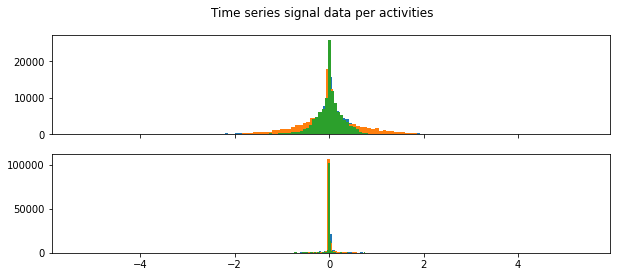

In [ ]:

uclass=fclass[fclass['class']==2]
wclass=fclass[fclass['class']==5]
fig, axes = plt.subplots(2,sharex=True,figsize=(10,4))

fig.suptitle('Time series signal data per activities')
axes[0].hist(uclass[0],bins=100)

axes[0].hist(uclass[1],bins=100)

axes[0].hist(uclass[2],bins=100,label='walking upstair')
#lines, labels = fig.axes[0].get_legend_handles_labels()
#fig.legend(lines, labels, loc = 'upper right')
axes[1].hist(wclass[0],bins=100)

axes[1].hist(wclass[1],bins=100)

axes[1].hist(wclass[2],bins=100,label='laying')

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        #out=f.log_softmax(out)
        #out = F.log_softmax(self.out(h_out), 1)
        # out.size() --> 100, 10
        return out

In [11]:
num_epochs = 300
learning_rate = 0.01
seq_length=128
input_dim = 6
hidden_dim = 13
layer_dim = 1

output_dim = 13

lstm = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
  running_loss=0
  
  for i in range(1,15):
   Xtrain, ytrain=load_group('acc','gyro',i)
   outputs = lstm(Xtrain.float())
   optimizer.zero_grad()
    
    # obtain the loss function
   loss = criterion(outputs, ytrain.long())
    
   loss.backward()
    
   optimizer.step()
    #if epoch % 100 == 0:
   print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
   
   
   
   running_loss += loss.item()
   for i in range(15,16):
     Xtest, ytest=load_group('acc','gyro',i)

   
            # Calculate Accuracy         
     correct = 0
     total = 0
            # Iterate through test dataset
   #for Xtest, ytest in test_loader:
     lstm.eval()
     y_pred = lstm(Xtest.float())
     test_predict=torch.argmax(y_pred, dim=-1)
     total += ytest.size(0)
     correct += (test_predict== ytest).sum()

     accuracy = 100 * correct // total
     print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

                # Resize images
                #images = images.view(-1, seq_dim, input_dim)
          
               
     #data_predict = test_predict.data.numpy()
     #dataY_plot = y_test.data.numpy()


                # Forward pass only to get logits/output
                #outputs = model(images)
    

                # Get predictions from the maximum value
                #_, predicted = torch.max(outputs.data, 1)
    
                # Total number of labels
    

                # Total correct predictions
    

            # Print Loss
    

Streaming output truncated to the last 5000 lines.
Iteration: <built-in function iter>. Loss: 0.4432607889175415. Accuracy: 87
Epoch: 121, loss: 0.44489
Iteration: <built-in function iter>. Loss: 0.4448944330215454. Accuracy: 86
Epoch: 121, loss: 0.39858
Iteration: <built-in function iter>. Loss: 0.39857807755470276. Accuracy: 87
Epoch: 121, loss: 0.52711
Iteration: <built-in function iter>. Loss: 0.527105450630188. Accuracy: 89
Epoch: 121, loss: 0.26567
Iteration: <built-in function iter>. Loss: 0.26566779613494873. Accuracy: 93
Epoch: 121, loss: 0.35310
Iteration: <built-in function iter>. Loss: 0.3531036078929901. Accuracy: 93
Epoch: 121, loss: 0.38051
Iteration: <built-in function iter>. Loss: 0.3805052638053894. Accuracy: 93
Epoch: 121, loss: 0.29481
Iteration: <built-in function iter>. Loss: 0.2948102056980133. Accuracy: 93
Epoch: 122, loss: 0.24332
Iteration: <built-in function iter>. Loss: 0.24332386255264282. Accuracy: 93
Epoch: 122, loss: 0.22653
Iteration: <built-in function

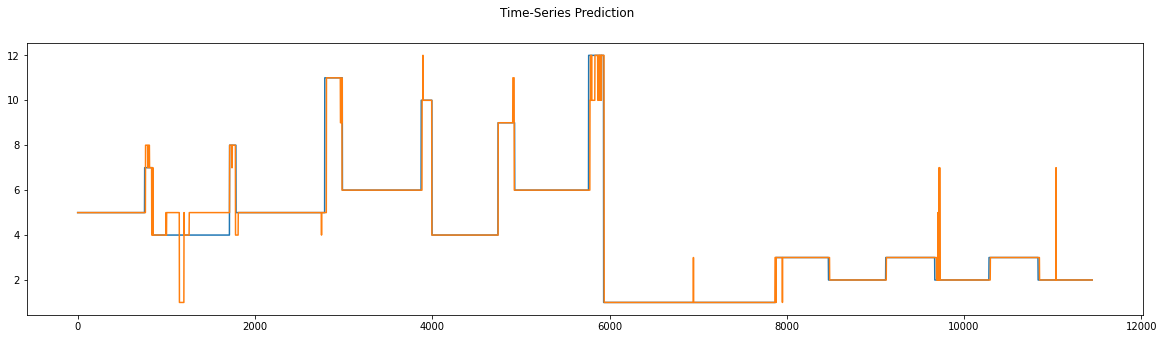

In [12]:
lstm.eval()
y_pred = lstm(Xtest.float())
test_predict=torch.argmax(y_pred, dim=-1) 
data_predict = test_predict.data.numpy()
dataY_plot = ytest.data.numpy()

#data_predict = sc.inverse_transform(data_predict)
#dataY_plot = sc.inverse_transform(dataY_plot)

#plt.axvline(x=13799, c='r', linestyle='--')
plt.figure(figsize=(20,5))
plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()